# Unit 1: Vectors, Matrices, Inverses, and Determinants

In this unit:
1. Vectors
1. Operations with vectors
1. Dot product
1. Norms
1. Matrices
1. Operations with matrices
1. Special matrices
1. Transpose
1. Inverses 
1. Determinants
1. Gradient vectors


### Dimension (length) of a vector

In [1]:
v1 = 1.0

1.0

In [2]:
typeof(v1)

Float64

In [3]:
v1 = [1.0]

1-element Vector{Float64}:
 1.0

In [4]:
v1 = [1] #scalar
v2 = [1,2] #in the plane
v3 = [1,2,3] # in space
v4 = [1,2,3,4] #higher diemension
println("Length of v3 = ", length(v3))
length.([v1,v2,v3,v4])

Length of v3 = 3


4-element Vector{Int64}:
 1
 2
 3
 4

In [5]:
typeof([v1,v2,v3,v4])

Vector{Vector{Int64}} (alias for Array{Array{Int64, 1}, 1})

In [6]:
length([v1,v2,v3,v4])

4

In [7]:
length.([v1,v2,v3,v4])

4-element Vector{Int64}:
 1
 2
 3
 4

In [8]:
? length

search: length



```
length(collection) -> Integer
```

Return the number of elements in the collection.

Use [`lastindex`](@ref) to get the last valid index of an indexable collection.

See also: [`size`](@ref), [`ndims`](@ref), [`eachindex`](@ref).

# Examples

```jldoctest
julia> length(1:5)
5

julia> length([1, 2, 3, 4])
4

julia> length([1 2; 3 4])
4
```

---

```
length(A::AbstractArray)
```

Return the number of elements in the array, defaults to `prod(size(A))`.

# Examples

```jldoctest
julia> length([1, 2, 3, 4])
4

julia> length([1 2; 3 4])
4
```

---

```
length(s::AbstractString) -> Int
length(s::AbstractString, i::Integer, j::Integer) -> Int
```

Return the number of characters in string `s` from indices `i` through `j`.

This is computed as the number of code unit indices from `i` to `j` which are valid character indices. With only a single string argument, this computes the number of characters in the entire string. With `i` and `j` arguments it computes the number of indices between `i` and `j` inclusive that are valid indices in the string `s`. In addition to in-bounds values, `i` may take the out-of-bounds value `ncodeunits(s) + 1` and `j` may take the out-of-bounds value `0`.

!!! note
    The time complexity of this operation is linear in general. That is, it will take the time proportional to the number of bytes or characters in the string because it counts the value on the fly. This is in contrast to the method for arrays, which is a constant-time operation.


See also [`isvalid`](@ref), [`ncodeunits`](@ref), [`lastindex`](@ref), [`thisind`](@ref), [`nextind`](@ref), [`prevind`](@ref).

# Examples

```jldoctest
julia> length("jμΛIα")
5
```


### Linear combintations of vectors

A LaTeX formula:
$$\alpha_1 v_1 + \alpha_2 v_2$$

In [9]:
v1 = [1,2,3]
v2 = [4,5,6]
α1 = 2
α2 = -1
α1*v1 + α2*v2

3-element Vector{Int64}:
 -2
 -1
  0

### Dot products

$$
\int_0^\infty \frac{1}{x} \, dx
$$

$$
u \cdot v = u^{T} v = \sum_{i=1}^n u_i v_i
$$

In [10]:
v1 = 0.15*ones(6)
v1[6] = 0.25
v2 = [90,80,30,60,90,100]

6-element Vector{Int64}:
  90
  80
  30
  60
  90
 100

In [11]:
using LinearAlgebra
n = length(v1)
n == length(v2) || @error "Vectors must be of same length"
v1'*v2, dot(v1,v2), v1 ⋅ v2, sum([v1[k]*v2[k] for k in 1:n]) #get ⋅ using \cdot +[TAB]

(77.5, 77.5, 77.5, 77.5)

In [12]:
v1⋅v2

77.5

In [13]:
#comprehension
[v1[k]*v2[k] for k in 1:n]

6-element Vector{Float64}:
 13.5
 12.0
  4.5
  9.0
 13.5
 25.0

In [14]:
typeof(v1'*v2)

Float64

In [15]:
sum(v1.*v2)

77.5

### Norms

The $L_2$ norm:
$$
||u|| = \sqrt{u^Tu} = \sqrt{\sum_{i=1}^n u_i^2}
$$

The $L_1$ norm
$$
||u||_1 = \sum_{i=1}^n |u_i|
$$

In [16]:
using LinearAlgebra

In [17]:
v1

6-element Vector{Float64}:
 0.15
 0.15
 0.15
 0.15
 0.15
 0.25

In [18]:
norm(v1,1)

1.0

In [19]:
norm(v1),norm(v1,2),sqrt(v1'*v1) 

(0.4183300132670378, 0.4183300132670378, 0.4183300132670378)

In [20]:
norm(-v1)

0.4183300132670378

In [21]:
norm(v1,1),norm(-v1,1) #The L_1 norm

(1.0, 1.0)

$||u + v||^2 = ||u||^2 + 2u^Tv + ||v||^2$

$||u|| \ge 0$

$||\gamma u || = |\gamma|~||u||$

$||u|| = 0$ only if $u = 0$.

### Normalizing a vector

In [22]:
v1

6-element Vector{Float64}:
 0.15
 0.15
 0.15
 0.15
 0.15
 0.25

In [23]:
normVect(v) = v/norm(v)
vn = normVect(v1)
println("Norm of normed vec: ", norm(vn))
vn

Norm of normed vec: 0.9999999999999999


6-element Vector{Float64}:
 0.35856858280031806
 0.35856858280031806
 0.35856858280031806
 0.35856858280031806
 0.35856858280031806
 0.5976143046671968

### Angle between two vectors

$$
\angle(u,v) = \arccos \Big( \frac{u^T v}{||u|| ||v||} \Big)
$$

In [24]:
u = [10,0]
v = [-10, 0]
θ = acos((u ⋅ v)/norm(u)/norm(v))
rad2deg(θ)

180.0

In [25]:
# Don't confuse with angle of a complex number

In [26]:
x = 2 + 3im

2 + 3im

In [27]:
? angle

search: angle StepRangeLen UpperTriangular LowerTriangular UnitUpperTriangular



```
angle(z)
```

Compute the phase angle in radians of a complex number `z`.

See also: [`atan`](@ref), [`cis`](@ref).

# Examples

```jldoctest
julia> rad2deg(angle(1 + im))
45.0

julia> rad2deg(angle(1 - im))
-45.0

julia> rad2deg(angle(-1 - im))
-135.0
```


Sometimes we speak about $\cos \theta$:

$$
\cos \theta = \frac{u^T v}{||u|| ||v||}
$$

In [28]:
u = [10,0]
v = [5, 5]
θ = (u ⋅ v)/norm(u)/norm(v)
θ, rad2deg(θ),sqrt(2)/2

(0.7071067811865475, 40.51423422706977, 0.7071067811865476)

### Cauchy-Schwarz, Inequality

$$\left[
\begin{matrix}
1 \\
2 \\
3 \\
\end{matrix}\right]$$

$$
|u^T v| \le ||u|| ~ ||v||
$$

$$
(u^T v)^2 \le ||u||^2 ~ ||v||^2
$$

Proof (essense):  Assume $u \neq 0$ and $v \neq 0$. Set $\alpha := ||u||$, $\beta := ||v||$:

$$
0 \le || \alpha u - \beta v||^2 = \ldots \ldots = 2 ||u||^2 ||v||^2 - 2 ||u||~||v|| (u^T v)
$$

Hence,

$$
u^T v \le ||u||~||v||
$$

Now repeat with $-u$ and $v$.

### Triangle Inequality

$$||u + v|| \le ||u|| + ||v||$$

Proof:

$$ ||u+v||^2 = ||u||^2 + 2u^T v + ||v||^2 \le ||u||^2 + 2 ||u|| ~ ||v|| + ||v||^2 = \big( ||u|| + ||v|| \big)^2$$

$$(a+b)^2 = a^2+2ab+b^2$$

CS check:

$$
0 \le ||u|| ~ ||v|| - |u^T v|
$$

In [29]:
? push!

search: push! pushfirst! pushdisplay



```
push!(collection, items...) -> collection
```

Insert one or more `items` in `collection`. If `collection` is an ordered container, the items are inserted at the end (in the given order).

# Examples

```jldoctest
julia> push!([1, 2, 3], 4, 5, 6)
6-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
```

If `collection` is ordered, use [`append!`](@ref) to add all the elements of another collection to it. The result of the preceding example is equivalent to `append!([1, 2, 3], [4, 5, 6])`. For `AbstractSet` objects, [`union!`](@ref) can be used instead.

See [`sizehint!`](@ref) for notes about the performance model.

See also [`pushfirst!`](@ref).


$$||u + v|| \le ||u|| + ||v||$$

$$0 \le ||u|| + ||v|| - ||u + v||$$

In [30]:
u = [5,5]
v = [10,10]
norm(u) + norm(v)

21.213203435596427

In [31]:
norm(u+v)

21.213203435596427

In [32]:
n = 2 #length of vectors
N = 10^5 #run on so many vectors
arr1 = [] #init an empty array
for _ in 1:N
    u = rand(n)
    v = rand(n)
    #cs = norm(u)*norm(v)- abs(u ⋅ v) #Cauchy-Schwartz
    #Exercise: modify line 7 to check for triangle inequality (Give Julia code in chat)
    ti = norm(u) + norm(v) - norm(u+v)
    push!(arr1,ti) #append to the array
end
minimum(arr1)

2.2470914018413168e-13

In [33]:
arr1

100000-element Vector{Any}:
 0.0006975195860969841
 0.049525846672158313
 0.013298294827938761
 0.01962665013232434
 0.22138283866119868
 0.0020960246529798665
 0.0006537901188621298
 0.0003912841774824649
 0.0002072789828932997
 0.0041460801476409515
 0.022033937219621436
 0.0046301764792899824
 0.0002457558083306388
 ⋮
 0.005177354937960121
 0.029180347878988933
 0.022613578273249724
 0.03763201831041485
 0.02870895172825505
 0.020374327204199294
 0.00011935001531071521
 0.24270409600209475
 0.002707357262211829
 0.005924226209857331
 0.007427094078749752
 0.001272184264452525

In [34]:
using Pkg
Pkg.add("GR")
Pkg.add("Plots")
Pkg.add("StatsPlots")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [28b8d3ca] + GR v0.57.5
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
   Installed FFTW ──────────────── v1.4.2
   Installed IntelOpenMP_jll ───── v2018.0.3+2
   Installed StatsFuns ─────────── v0.9.8
   Installed OffsetArrays ──────── v1.10.0
   Installed PDMats ────────────── v0.11.1
   Installed Distances ─────────── v0.10.3
   Installed NearestNeighbors ──── v0.4.9
   Installed Rmath_jll ─────────── v0.3.0+0
   Installed Ratios ────────────── v0.4.0
   Installed SentinelArrays ────── v1.3.2
   Installed MKL_jll ───────────── v2021.1.1+1
   Installed StatsPlots ────────── v0.14.22
   Installed DataValues ────────── v0.4.13
   Installed Special

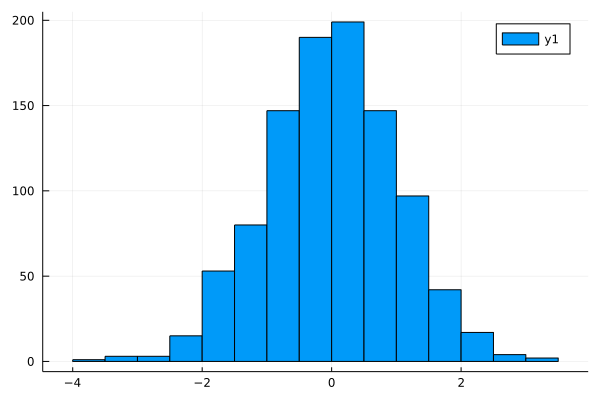

In [35]:
using Plots
histogram(randn(1000))

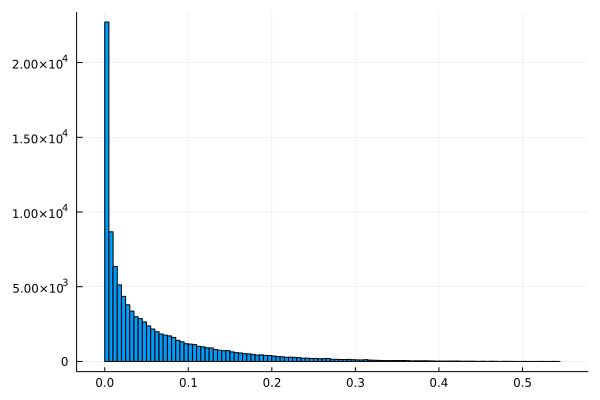

In [36]:
using Plots
histogram(arr1,legend=false)

### Matrices

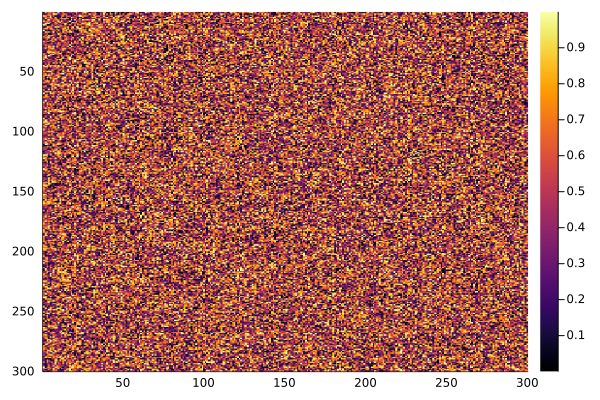

In [1]:
using Plots
heatmap(rand(300,300),yflip = true)

In [3]:
H = [i == j+4 || i == j-2 for i in 1:10, j in 1:10]

10×10 Matrix{Bool}:
 0  0  1  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0
 1  0  0  0  0  0  1  0  0  0
 0  1  0  0  0  0  0  1  0  0
 0  0  1  0  0  0  0  0  1  0
 0  0  0  1  0  0  0  0  0  1
 0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0

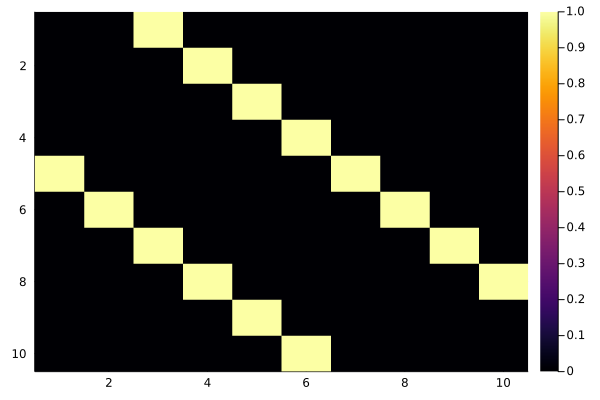

In [4]:
heatmap(H,yflip = true)

In [5]:
A = [1 2; 3 4] #2 by 2 matrix
B = [-2 3; 1 3]
C = [0 1 2; 
    -1 1 0]; # 2 by 3 matrix
display(A)
display(B)
display(C)


2×2 Matrix{Int64}:
 1  2
 3  4

2×2 Matrix{Int64}:
 -2  3
  1  3

2×3 Matrix{Int64}:
  0  1  2
 -1  1  0

In [41]:
A+C

LoadError: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(2), Base.OneTo(2)), b has dims (Base.OneTo(2), Base.OneTo(3)), mismatch at 2")

In [42]:
A+B

2×2 Matrix{Int64}:
 -1  5
  4  7

In [43]:
3A

2×2 Matrix{Int64}:
 3   6
 9  12

In [44]:
2A+B

2×2 Matrix{Int64}:
 0   7
 7  11

In [45]:
A+C

LoadError: DimensionMismatch("dimensions must match: a has dims (Base.OneTo(2), Base.OneTo(2)), b has dims (Base.OneTo(2), Base.OneTo(3)), mismatch at 2")

### Matrix Multiplication

Four ways: 

* Dot product
* Cols
* Rows
* Outer product

In [46]:
display(A)
display(B)

2×2 Matrix{Int64}:
 1  2
 3  4

2×2 Matrix{Int64}:
 -2  3
  1  3

In [47]:
A[1,1]*B[1,2]+A[1,2]*B[2,2]

9

To get to the 9 value in entry 1,2 of the product A,B, I take the inner product of the first row of A and second collumn of B

In [48]:
A*B

2×2 Matrix{Int64}:
  0   9
 -2  21

In [49]:
B*A

2×2 Matrix{Int64}:
  7   8
 10  14

**Matrix multiplication is (generally) not commutative**

In [50]:
f(x) = x^2 #one line function

f (generic function with 1 method)

In [51]:
f(-4)

16

In [52]:
#doc string
""" 
My own matrix multiplication function \$A \\times B\$
"""
function myMatMult(A,B)
    n,m = size(A)
    p,q = size(B)
    if m != p #check number of col's of A = number of rows of b
        @error "Size mismatch"
    end
    C = zeros(n,q)
    for i in 1:n
        for j in 1:q
            C[i,j] = dot(A[i,:],B[:,j]) #dot product of i'th row of A and j'th col of B
        end
    end
    C
end

myMatMult

In [53]:
[1 2 3] #1 by 3 matrix (also happens to be a row vector)

1×3 Matrix{Int64}:
 1  2  3

In [54]:
[1;2] #2 by 1 matrix (also happens to be a col vector)

2-element Vector{Int64}:
 1
 2

In [55]:
size([1 2 3]),size([1;2])

((1, 3), (2,))

In [56]:
[1 ; 2]

2-element Vector{Int64}:
 1
 2

In [57]:
myMatMult([1 2 3],[1 0; 2 -3]) #attempt to multiply a 3x1 matrix by a 2x2 matrix

┌ Error: Size mismatch
└ @ Main In[52]:9


LoadError: DimensionMismatch("first array has length 3 which does not match the length of the second, 2.")

In [58]:
? myMatMult

search: myMatMult



My own matrix multiplication function $A \times B$


In [59]:
myMatMult(A,B)

2×2 Matrix{Float64}:
  0.0   9.0
 -2.0  21.0

LAPACK (matrix routines)

In [60]:
using Random
Random.seed!(0)
A = rand(100,100)
@time begin
    for _ in 1:1000
        global A = A*rand(100,100)
    end
end

  0.915988 seconds (2.37 M allocations: 282.540 MiB, 7.12% gc time, 74.53% compilation time)


In [61]:
Random.seed!(0)
A = rand(100,100)
@time begin
    for _ in 1:1000
        global A = myMatMult(A,rand(100,100))
    end
end

  7.380088 seconds (20.22 M allocations: 16.850 GiB, 45.97% gc time, 0.86% compilation time)


In [62]:
[1,2]*[10,100]' #outer product

2×2 Matrix{Int64}:
 10  100
 20  200

In [63]:
#doc string
""" 
Another way to implement (view) the matrix multiplication
"""
function outerProdMatrixProd(A,B)
    n,m = size(A)
    p,q = size(B)
    if m != p #check number of col's of A = number of rows of b
        @error "Size mismatch"
    end
    C = zeros(n,q)
    for k in 1:m
        #A[:,k] #k'th col of A
        #B[k,:] #k'th row of B
        #@show A[:,k]
        C += A[:,k]*B[k,:]' #outer product (don't forget the ')
    end
    C
end

outerProdMatrixProd

In [64]:
A = rand([7,12,33],5,3)

5×3 Matrix{Int64}:
 33  33  12
  7   7  12
 33  12  12
 33  12  33
  7  33  33

In [65]:
B = rand([-1,0,24,23,522,4],3,10)

3×10 Matrix{Int64}:
 522  522  24  4  24  522  0  -1    4  23
  -1   23   4  4  24    0  0  24   24  23
  -1    4   4  0  -1    0  0  -1  522  23

In [66]:
A*B

5×10 Matrix{Int64}:
 17181  18033  972  264  1572  17226  0  747   7188  1794
  3635   3863  244   56   324   3654  0  149   6460   598
 17202  17550  888  180  1068  17226  0  243   6684  1311
 17181  17634  972  180  1047  17226  0  222  17646  1794
  3588   4545  432  160   927   3654  0  752  18046  1679

In [67]:
outerProdMatrixProd(A,B)

5×10 Matrix{Float64}:
 17181.0  18033.0  972.0  264.0  1572.0  17226.0  0.0  747.0   7188.0  1794.0
  3635.0   3863.0  244.0   56.0   324.0   3654.0  0.0  149.0   6460.0   598.0
 17202.0  17550.0  888.0  180.0  1068.0  17226.0  0.0  243.0   6684.0  1311.0
 17181.0  17634.0  972.0  180.0  1047.0  17226.0  0.0  222.0  17646.0  1794.0
  3588.0   4545.0  432.0  160.0   927.0   3654.0  0.0  752.0  18046.0  1679.0

In [68]:
norm(outerProdMatrixProd(A,B) - A*B) #check these are the same...

0.0

$$||v||$$

$$|v|$$

### Matrix multiplication is associative

In [69]:
A = rand([10,20],2,4)
display(A)
B = rand([-1,3],4,5)
display(B)
C = rand([10,20,30],5,3)
display(C)
A*B*C  # or A*(B*C)

2×4 Matrix{Int64}:
 10  10  10  10
 10  10  10  20

4×5 Matrix{Int64}:
 3  -1  -1   3   3
 3  -1   3  -1   3
 3  -1   3   3   3
 3  -1   3   3  -1

5×3 Matrix{Int64}:
 10  30  10
 20  10  30
 10  20  20
 30  10  20
 10  30  20

2×3 Matrix{Int64}:
 4400  8000  4800
 5600  9400  5800

In [70]:
(A*B)*C

2×3 Matrix{Int64}:
 4400  8000  4800
 5600  9400  5800

In [71]:
A*(B*C)

2×3 Matrix{Int64}:
 4400  8000  4800
 5600  9400  5800

### Identity Matrix

In [72]:
using LinearAlgebra
I

UniformScaling{Bool}
true*I

In [73]:
A = [1 2; 3 4] 

2×2 Matrix{Int64}:
 1  2
 3  4

In [74]:
A*I

2×2 Matrix{Int64}:
 1  2
 3  4

In [75]:
A*I .== A   #== comparison operator and "." does it element wise

LoadError: syntax: incomplete: unterminated multi-line comment #= ... =#

In [76]:
I*A

2×2 Matrix{Int64}:
 1  2
 3  4

In [77]:
ones(3)

3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [78]:
myI = Diagonal(ones(2))  #constructors are typically first letter cap

2×2 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅ 
  ⋅   1.0

In [79]:
? Diagonal

search: Diagonal Bidiagonal Tridiagonal SymTridiagonal



```
Diagonal(V::AbstractVector)
```

Construct a matrix with `V` as its diagonal.

See also [`diag`](@ref), [`diagm`](@ref).

# Examples

```jldoctest
julia> Diagonal([1, 10, 100])
3×3 Diagonal{Int64, Vector{Int64}}:
 1   ⋅    ⋅
 ⋅  10    ⋅
 ⋅   ⋅  100

julia> diagm([7, 13])
2×2 Matrix{Int64}:
 7   0
 0  13
```

---

```
Diagonal(A::AbstractMatrix)
```

Construct a matrix from the diagonal of `A`.

# Examples

```jldoctest
julia> A = permutedims(reshape(1:15, 5, 3))
3×5 Matrix{Int64}:
  1   2   3   4   5
  6   7   8   9  10
 11  12  13  14  15

julia> Diagonal(A)
3×3 Diagonal{Int64, Vector{Int64}}:
 1  ⋅   ⋅
 ⋅  7   ⋅
 ⋅  ⋅  13

julia> diag(A, 2)
3-element Vector{Int64}:
  3
  9
 15
```

---

```
Diagonal{T}(undef, n)
```

Construct an uninitialized `Diagonal{T}` of length `n`. See `undef`.


In [80]:
myI

2×2 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅ 
  ⋅   1.0

In [81]:
A = [1 2 3; 4 5 6; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [82]:
sum(diag(A)) #1 + 5 +9

15

In [83]:
tr(A)  #trace of a (square) matrix is the sum of the diagonals 

15

In [84]:
diag(myI)

2-element Vector{Float64}:
 1.0
 1.0

In [85]:
diagm(1=>[5,7], -1=>[2,3,4]) #construct a `banded' matrix

4×4 Matrix{Int64}:
 0  5  0  0
 2  0  7  0
 0  3  0  0
 0  0  4  0

### Inverses

$$A^{-1} A = I, 
\qquad
A A^{-1} = I$$

never write 
$$
\frac{1}{A}
$$
when $A$ is a matrix.

$$
\frac{B}{A}
$$
do I mean $B^{-1} A$ or $A B^{-1}$???? NEVER write that.

In [86]:
1/0 #not good   1/x 

Inf

In [87]:
A = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [88]:
? inv

search: inv invoke invmod invperm invisible invpermute! InvalidStateException



```
inv(x)
```

Return the multiplicative inverse of `x`, such that `x*inv(x)` or `inv(x)*x` yields [`one(x)`](@ref) (the multiplicative identity) up to roundoff errors.

If `x` is a number, this is essentially the same as `one(x)/x`, but for some types `inv(x)` may be slightly more efficient.

# Examples

```jldoctest
julia> inv(2)
0.5

julia> inv(1 + 2im)
0.2 - 0.4im

julia> inv(1 + 2im) * (1 + 2im)
1.0 + 0.0im

julia> inv(2//3)
3//2
```

!!! compat "Julia 1.2"
    `inv(::Missing)` requires at least Julia 1.2.


---

```
inv(M)
```

Matrix inverse. Computes matrix `N` such that `M * N = I`, where `I` is the identity matrix. Computed by solving the left-division `N = M \ I`.

# Examples

```jldoctest
julia> M = [2 5; 1 3]
2×2 Matrix{Int64}:
 2  5
 1  3

julia> N = inv(M)
2×2 Matrix{Float64}:
  3.0  -5.0
 -1.0   2.0

julia> M*N == N*M == Matrix(I, 2, 2)
true
```

---

```
inv(d::MatrixDistribution)
```

If known, returns a `MatrixDistribution` instance representing the distribution of inv(X), where X is a random matrix with distribution `d`.


In [89]:
Ai = inv(A)

2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5

In [90]:
Ai*A

2×2 Matrix{Float64}:
 1.0          0.0
 2.22045e-16  1.0

In [91]:
A*Ai

2×2 Matrix{Float64}:
 1.0          0.0
 8.88178e-16  1.0

**Claim:** Suppose $BA = I$ and also $AC = I$. Then $B=C$.

proof?

**Claim:** If $A$ and $B$ are invertible then so is $AB$ with inverse:
$$
(AB)^{-1} = B^{-1}A^{-1}
$$

In [92]:
A = [1 2; 3 4];
B = [5 6; 7 8]
inv(A*B)

2×2 Matrix{Float64}:
  12.5   -5.5
 -10.75   4.75

In [93]:
inv(B)*inv(A)

2×2 Matrix{Float64}:
  12.5   -5.5
 -10.75   4.75

In [94]:
inv(A)*inv(B) #something different

2×2 Matrix{Float64}:
 11.5   -8.5
 -7.75   5.75

### Transpose

In [95]:
A = [j+3(i-1) for i in 1:3, j in 1:3] #i is rows and j is cols

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [96]:
1:9

1:9

In [97]:
typeof(1:9)

UnitRange{Int64}

In [98]:
collect(1:9)

9-element Vector{Int64}:
 1
 2
 3
 4
 5
 6
 7
 8
 9

In [99]:
reshape(collect(1:9),3,3)'  #look at reshape

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  2  3
 4  5  6
 7  8  9

In [100]:
? vec

search: vec Vector VecOrMat VecElement cvec eigvecs BitVector normVect



```
vec(a::AbstractArray) -> AbstractVector
```

Reshape the array `a` as a one-dimensional column vector. Return `a` if it is already an `AbstractVector`. The resulting array shares the same underlying data as `a`, so it will only be mutable if `a` is mutable, in which case modifying one will also modify the other.

# Examples

```jldoctest
julia> a = [1 2 3; 4 5 6]
2×3 Matrix{Int64}:
 1  2  3
 4  5  6

julia> vec(a)
6-element Vector{Int64}:
 1
 4
 2
 5
 3
 6

julia> vec(1:3)
1:3
```

See also [`reshape`](@ref), [`dropdims`](@ref).

---

```
vec(d::MatrixDistribution)
```

If known, returns a `MultivariateDistribution` instance representing the distribution of vec(X), where X is a random matrix with distribution `d`.


In [101]:
vec([1 2 3; 4 5 6])

6-element Vector{Int64}:
 1
 4
 2
 5
 3
 6

In [102]:
vec([1 2 3; 4 5 6]')

6-element reshape(adjoint(::Matrix{Int64}), 6) with eltype Int64:
 1
 2
 3
 4
 5
 6

In [103]:
A

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [104]:
A' #Adjoint means conjugate tranpose

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4  7
 2  5  8
 3  6  9

In [105]:
A = [1+2im 2-3im; -im 0 ]

2×2 Matrix{Complex{Int64}}:
 1+2im  2-3im
 0-1im  0+0im

In [106]:
A'

2×2 adjoint(::Matrix{Complex{Int64}}) with eltype Complex{Int64}:
 1-2im  0+1im
 2+3im  0+0im

In [107]:
real.(A)

2×2 Matrix{Int64}:
 1  2
 0  0

In [108]:
A = [1 2 3 ; 4 5 6; 7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [109]:
A''

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [110]:
A'

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 1  4  7
 2  5  8
 3  6  9

Let $A$ be a matrix with generally complex entries. Then the adjoint, $A^\dagger$ has $i,j$ entry which is $\overline{A_{j,i}}$ where $\overline{z}$ is the complex conjugate of $z$. That is if $z= a + bi$ then $\overline{z} = a - bi$.

$A^T$

A symmetric matrix has $A^T = A$

In [111]:
A

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [112]:
issymmetric(A)

false

$(A+B)^T = A^T + B^T$

In [113]:
S = (A'+A)/2 #"symmetrizing" a matrix
display(S)
issymmetric(S)

3×3 Matrix{Float64}:
 1.0  3.0  5.0
 3.0  5.0  7.0
 5.0  7.0  9.0

true

Say $B$ is symmetric and I do C = $\frac{1}{2} (B^T + B)$

**Claim:**
$$(A B)^T = B^T A^T$$

Inner product for vectors $u$ and $v$ is $u^T v$

$(u^T v)^T = v^T u$

In [114]:
B = A .+ 3

3×3 Matrix{Int64}:
  4   5   6
  7   8   9
 10  11  12

In [115]:
display((A*B)')
display(B'*A')

3×3 adjoint(::Matrix{Int64}) with eltype Int64:
 48  111  174
 54  126  198
 60  141  222

3×3 Matrix{Int64}:
 48  111  174
 54  126  198
 60  141  222

If $A^{-1}$ exists then $(A^{-1})^T = (A^T)^{-1}$ so we sometimes write $A^{-T}$.

### Determinants

In [116]:
A = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [117]:
using LinearAlgebra
det(A), A[1,1]*A[2,2] - A[1,2]*A[2,1]

(-2.0, -2)

In [118]:
B = [ 1 2 3; 4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

In [119]:
det(B)

LoadError: DimensionMismatch("matrix is not square: dimensions are (2, 3)")

In [120]:
det(Diagonal(ones(5)))

1.0

In [121]:
A = Diagonal([1,2,3])

3×3 Diagonal{Int64, Vector{Int64}}:
 1  ⋅  ⋅
 ⋅  2  ⋅
 ⋅  ⋅  3

In [122]:
det(A) #det of diagonal is produt of the elements 1*2*3

6

In [123]:
A = zeros(3,3) + A #Rob thanks

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  3.0

In [124]:
A = convert(Array{Float64,2},A) #alt is to use the convert

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  2.0  0.0
 0.0  0.0  3.0

In [125]:
A[2,3] = -53
A[1,3] = 7
A

3×3 Matrix{Float64}:
 1.0  0.0    7.0
 0.0  2.0  -53.0
 0.0  0.0    3.0

In [126]:
det(A) #stil the product of diagonals for triangular (upper or lower)

6.0

In [127]:
A[3,1] = 35
A

3×3 Matrix{Float64}:
  1.0  0.0    7.0
  0.0  2.0  -53.0
 35.0  0.0    3.0

In [128]:
det(A)

-484.0

In [129]:
setdiff(1:4,2)

3-element Vector{Int64}:
 1
 3
 4

In [130]:
#if you are just now "learning" programming this is a typical recursion exercise
function myDet(A)
    n, m = size(A)
    n == m || @error "Dimension mismatch" #shortcircut or
    if n == 2
        return A[1,1]*A[2,2]-A[1,2]*A[2,1] #2 by 2 has simple formula
    else
        #higher dimension has a recursive formula
        return sum([(-1)^(i+1)*A[1,i]*myDet(A[2:n,setdiff(1:n,i)])   for i in 1:n])
    end
end

myDet (generic function with 1 method)

In [131]:
myDet(rand(10,10))

0.014201970526097674

In [132]:
det(rand([-10,-20],2,2))

-200.0

In [133]:
+ - + - + -

LoadError: MethodError: no method matching +(::typeof(-))
[0mClosest candidates are:
[0m  +(::P, [91m::ChainRulesCore.Tangent{P}[39m) where P at /Users/wakayama.hideki/.julia/packages/ChainRulesCore/4bCB1/src/differential_arithmetic.jl:149
[0m  +(::Any, [91m::ChainRulesCore.AbstractThunk[39m) at /Users/wakayama.hideki/.julia/packages/ChainRulesCore/4bCB1/src/differential_arithmetic.jl:139
[0m  +(::T1, [91m::DataValues.DataValue{T2}[39m) where {T1, T2} at /Users/wakayama.hideki/.julia/packages/DataValues/N7oeL/src/scalar/operations.jl:75
[0m  ...

In [134]:
myDet(A)

-484.0

In [135]:
det(rand(1000,1000))

Inf

In [173]:
myDet(rand(1000,1000))

LoadError: InterruptException:

In [137]:
A = rand(5,5)

5×5 Matrix{Float64}:
 0.264021   0.283043  0.601022  0.341235  0.325266
 0.0615215  0.843502  0.274775  0.621826  0.984081
 0.412765   0.111129  0.900358  0.542206  0.688033
 0.814527   0.516271  0.983664  0.593903  0.833352
 0.437614   0.210056  0.623585  0.889428  0.538352

In [138]:
det(A)

-0.04812360102455618

In [139]:
myDet(A)

-0.04812360102455618

**Claim:**
$$|AB| =|A| |B|$$

In [140]:
A = rand(4,4)
B = rand(4,4)
det(A*B),   det(A)*det(B)

(-0.0008610778051135207, -0.0008610778051135236)

**Claim:** If $A$ is invertible then,
$$
|A^{-1}| = |A|^{-1}
\qquad
\text{could write }
\frac{1}{|A|}
$$

In [141]:
det(inv(A)),1/det(A)

(186.87404902493546, 186.87404902493526)

In [142]:
A = [1 0;
     1 0]   #det(A) = 1×0 - 0×1 = 0

2×2 Matrix{Int64}:
 1  0
 1  0

In [143]:
det(A)

0.0

In [172]:
inv(A) #A is singular or non-invertible

2×2 Matrix{Float64}:
 -17.7684   9.96923
  10.7479  -4.73248

In [145]:
B = [1 2 3;
     4 5 6;
     5 7 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 5  7  9

In [146]:
det(B)

2.664535259100378e-15

In [147]:
inv(B) #numerical trouble

3×3 Matrix{Float64}:
  1.1259e15   1.1259e15  -1.1259e15
 -2.2518e15  -2.2518e15   2.2518e15
  1.1259e15   1.1259e15  -1.1259e15

In [148]:
myDet(B) #did integer arithmetic

0

In [149]:
cond(B) #condition number - coming towards end of course

1.3295683760909222e16

In [150]:
? cond

search: cond condskeel Condition wctondc contour3d contour3d! macroexpand



```
cond(M, p::Real=2)
```

Condition number of the matrix `M`, computed using the operator `p`-norm. Valid values for `p` are `1`, `2` (default), or `Inf`.


### Inverse of $2 \times 2$ matrix

Special case of *Cramer's rule* (which we don't really speak about)

In [151]:
eps()

2.220446049250313e-16

In [169]:
# Derive it....
function inv2mat(A)
   n,m = size(A)
   (n==2 && m== 2) || @error "This is for a 2×2 matrix" #\times + [TAB]
   Δ = det(A) #\Delta + [TAB]
   abs(Δ) > eps() || @error "Matrix is singular" #could have done Δ != 0
   a,b,c,d = A[1,1], A[1,2], A[2,1], A[2,2]
    #  a b
    #  c d
   return [d -b;
           -c a]/Δ
end

A = rand(2,2)

Ai = inv2mat(A)
Ai * A

2×2 Matrix{Float64}:
 1.0  -8.88178e-16
 0.0   1.0

In [153]:
? eps

search: eps @elapsed stephist stephist! setperspectiveprojection RecipesBase



```
eps(::Type{T}) where T<:AbstractFloat
eps()
```

Return the *machine epsilon* of the floating point type `T` (`T = Float64` by default). This is defined as the gap between 1 and the next largest value representable by `typeof(one(T))`, and is equivalent to `eps(one(T))`.  (Since `eps(T)` is a bound on the *relative error* of `T`, it is a "dimensionless" quantity like [`one`](@ref).)

# Examples

```jldoctest
julia> eps()
2.220446049250313e-16

julia> eps(Float32)
1.1920929f-7

julia> 1.0 + eps()
1.0000000000000002

julia> 1.0 + eps()/2
1.0
```

---

```
eps(x::AbstractFloat)
```

Return the *unit in last place* (ulp) of `x`. This is the distance between consecutive representable floating point values at `x`. In most cases, if the distance on either side of `x` is different, then the larger of the two is taken, that is

```
eps(x) == max(x-prevfloat(x), nextfloat(x)-x)
```

The exceptions to this rule are the smallest and largest finite values (e.g. `nextfloat(-Inf)` and `prevfloat(Inf)` for [`Float64`](@ref)), which round to the smaller of the values.

The rationale for this behavior is that `eps` bounds the floating point rounding error. Under the default `RoundNearest` rounding mode, if $y$ is a real number and $x$ is the nearest floating point number to $y$, then

$$
|y-x| \leq \operatorname{eps}(x)/2.
$$

See also: [`nextfloat`](@ref), [`issubnormal`](@ref), [`floatmax`](@ref).

# Examples

```jldoctest
julia> eps(1.0)
2.220446049250313e-16

julia> eps(prevfloat(2.0))
2.220446049250313e-16

julia> eps(2.0)
4.440892098500626e-16

julia> x = prevfloat(Inf)      # largest finite Float64
1.7976931348623157e308

julia> x + eps(x)/2            # rounds up
Inf

julia> x + prevfloat(eps(x)/2) # rounds down
1.7976931348623157e308
```

---

```
eps(::Type{DateTime}) -> Millisecond
eps(::Type{Date}) -> Day
eps(::Type{Time}) -> Nanosecond
eps(::TimeType) -> Period
```

Return the smallest unit value supported by the `TimeType`.

# Examples

```jldoctest
julia> eps(DateTime)
1 millisecond

julia> eps(Date)
1 day

julia> eps(Time)
1 nanosecond
```


# Application: k-means

See Chapter 4 of [VMLS]

Taken from Listings 9.12 and 9.13 of [SWJ]:

$$
J^{\text {clust }}=\left(\left\|x_{1}-z_{c_{1}}\right\|^{2}+\cdots+\left\|x_{N}-z_{c_{N}}\right\|^{2}\right) / N
$$

With fixed representatives:
$$
\left(\min _{j=1, \ldots, k}\left\|x_{1}-z_{j}\right\|^{2}+\cdots+\min _{j=1, \ldots, k}\left\|x_{N}-z_{j}\right\|^{2}\right) / N
$$

With fixed assignments:
$$
z_{j}=\left(1 /\left|G_{j}\right|\right) \sum_{i \in G_{j}} x_{i}
$$

In [166]:
using Pkg
Pkg.add("Clustering")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [174]:
using Pkg
Pkg.add("RDataSets")

LoadError: The following package names could not be resolved:
 * RDataSets (not found in project, manifest or registry)


$$\frac{1}{3} \Big( [x_1,x_2] + [y_1, y_2] + [z_1,z_2] \Big)$$

In [168]:
df

LoadError: UndefVarError: df not defined

In [157]:
data

LoadError: UndefVarError: data not defined

In [158]:
xclaraKmeans

LoadError: UndefVarError: xclaraKmeans not defined

In [171]:
using Clustering, RDatasets, Random, Measures, Plots; pyplot() #PyPlot backend
Random.seed!(0)

K = 3 #number of clusters
df = dataset("cluster", "xclara") #iris dataset (from Fischer...) from RDatasets
data = copy(convert(Array{Float64}, df)')

seeds = initseeds(:rand, data, K) #init the centroids
xclaraKmeans = kmeans(data, K, init = seeds) #Thonis is the acti

println("Number of clusters: ", nclusters(xclaraKmeans))
println("Counts of clusters: ", counts(xclaraKmeans))

df.Group  = assignments(xclaraKmeans)

p1 = scatter(df[:, :V1], df[:, :V2], c=:blue, msw=0)
     scatter!(df[seeds, :V1], df[seeds, :V2], markersize=12, c=:red, msw=0)

p2 = scatter( df[df.Group .== 1, :V1], df[df.Group .== 1, :V2], c=:blue, msw=0)
     scatter!( df[df.Group .== 2, :V1], df[df.Group .== 2, :V2], c=:red, msw=0)
     scatter!( df[df.Group .== 3, :V1], df[df.Group .== 3, :V2], c=:green, msw=0)
     #scatter!( df[df.Group .== 4, :V1], df[df.Group .== 4, :V2], c=:black, msw=0) for 4


plot(p1,p2,legend=:none,ratio=:equal,
    size=(800,400), xlabel="V1", ylabel="V2", margin = 5mm)#margin needs Measures

LoadError: ArgumentError: Package RDatasets not found in current path:
- Run `import Pkg; Pkg.add("RDatasets")` to install the RDatasets package.


In [160]:
dataPoints

LoadError: UndefVarError: dataPoints not defined

In [161]:
using RDatasets, Distributions, Random, LinearAlgebra
Random.seed!(0)

K = 3
df = dataset("cluster", "xclara")
n,_ = size(df)
dataPoints = [convert(Array{Float64,1},df[i,:]) for i in 1:n]
shuffle!(dataPoints)

xMin,xMax = minimum(first.(dataPoints)),maximum(first.(dataPoints))
yMin,yMax = minimum(last.(dataPoints)),maximum(last.(dataPoints))

means = [[rand(Uniform(xMin,xMax)),rand(Uniform(yMin,yMax))]  for _ in 1:K]
labels = rand(1:K,n)
prevMeans = -means

while norm(prevMeans - means) > 0.001 #stopping criteria
    prevMeans = means
    labels = [argmin(
                    [norm(means[i]-x) for i in 1:K]
                        ) for x in dataPoints]
    means = [sum(dataPoints[labels .== i])/sum(labels .==i) for i in 1:K]
    println("next...")
end

cnts = [sum(labels .== i) for i in 1:K]
println("Counts of clusters (manual implementation): ", cnts)

LoadError: ArgumentError: Package RDatasets not found in current path:
- Run `import Pkg; Pkg.add("RDatasets")` to install the RDatasets package.


In [162]:
labels

LoadError: UndefVarError: labels not defined

In [163]:
labels .== 3

LoadError: UndefVarError: labels not defined

In [164]:
[1,2,3] == 8

false